<a href="https://colab.research.google.com/github/Ujjwalb2/Surge_files/blob/main/Knn_Classifier_for_reflectance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [55]:
file_path = '/content/for knn.xlsx'
df = pd.read_excel(file_path)


In [56]:
df = pd.concat([df, df], ignore_index=True).sample(frac=1).reset_index(drop=True)

In [57]:
df.head()

,sensor1,sensor2,sensor3,sensore4,sensor5,sensor6,Result
0,0.800000,0.336581,0.324485,0.302544,0.296274,0.380700,ripe
1,0.429603,0.266582,0.261798,1.345722,0.213939,0.114241,over-ripe
2,0.156421,0.201490,0.289570,1.715854,0.207189,0.114951,rotten
3,0.429603,0.266582,0.261798,1.345722,0.213939,0.114241,over-ripe
4,4.695436,0.685039,0.785894,3.689127,0.616882,0.233553,ripe


In [58]:
X = df[['sensor1', 'sensor2', 'sensor3', 'sensore4', 'sensor5', 'sensor6']]
y = df['Result']

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
k_values = range(1, 21)
cv_scores = []

In [63]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [64]:
best_k = k_values[np.argmax(cv_scores)]
print(f'Best k: {best_k}')


Best k: 1


In [65]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
y_pred = knn.predict(X_test)

In [74]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

   over-ripe       0.85      1.00      0.92        11
        ripe       1.00      1.00      1.00        14
      rotten       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



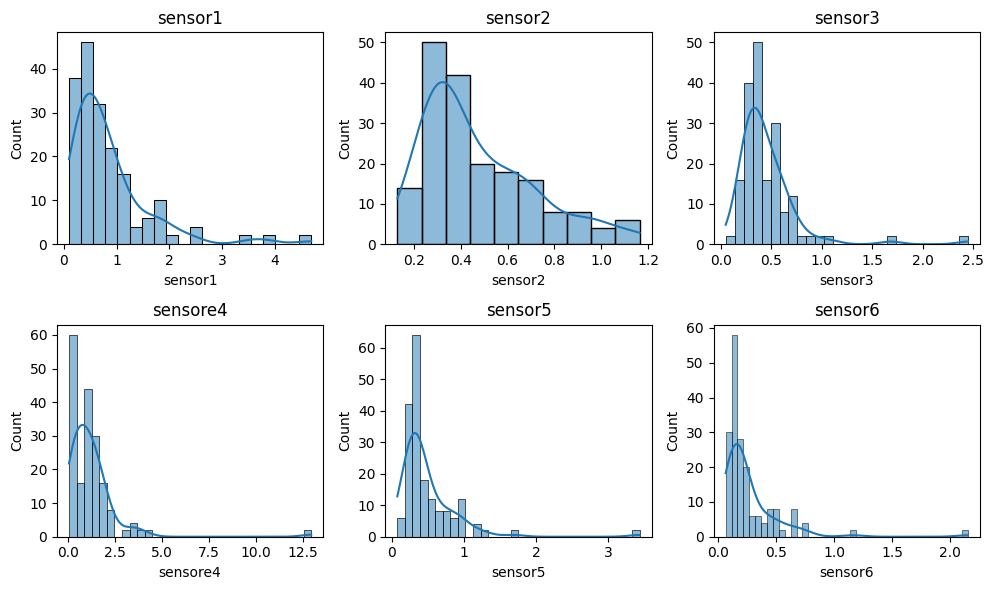

In [68]:
plt.figure(figsize=(10, 6))
for i, sensor in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[sensor], kde=True)
    plt.title(sensor)
plt.tight_layout()
plt.show()


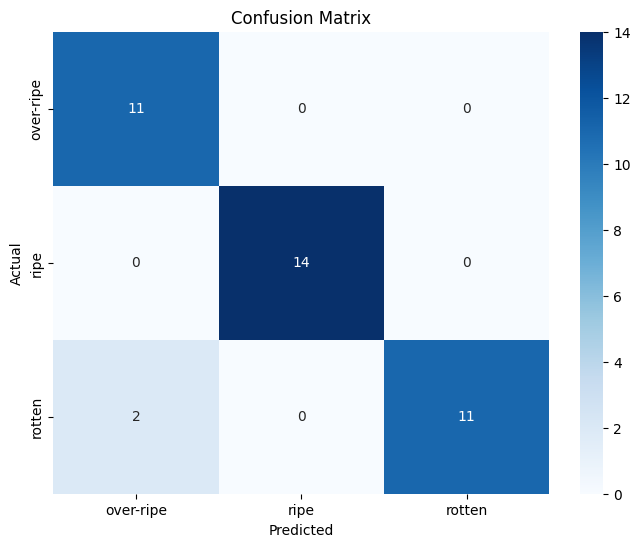

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


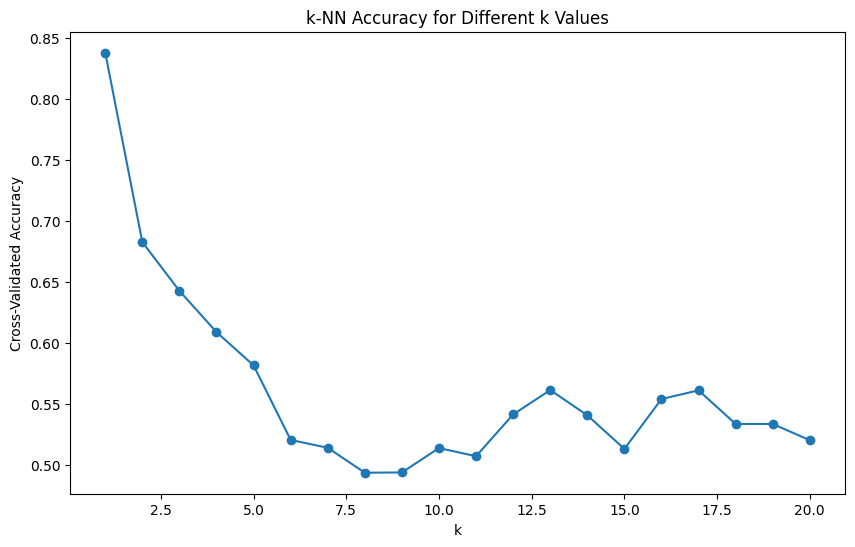

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Accuracy for Different k Values')
plt.show()
